In [1]:
pip install ludwig


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.1 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 69.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 17.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from ludwig.datasets import mnist
import pandas as pd


# Loads the dataset as a pandas.DataFrame
train_df, test_df, _ = mnist.load(split=True)

In [6]:
import logging
from ludwig.api import LudwigModel

model = LudwigModel(config='/kaggle/input/multilabel/multi-label.yaml')

2024-03-23 15:52:32,287	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-23 15:52:32,677	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [7]:
train_stats, preprocessed_data, output_directory = model.train(dataset=train_df)

/opt/conda/lib/python3.10/site-packages/ludwig/data/preprocessing.py:1735: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_cols[feature[COLUMN]] = dataset_cols[feature[COLUMN]].fillna(
/opt/conda/lib/python3.10/site-packages/ludwig/data/preprocessing.py:1735: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_cols[feature[COLUMN]] = dataset_cols[feature[COLUMN]].fillna(
2024-03-23 15:53:36.536095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 15:53:36.536198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 15:53:36

Training: 100%|██████████| 30/30 [00:04<00:00,  6.82it/s, loss=0.485]


In [11]:
import pandas as pd

predictions, output_directory = model.predict(test_df)
predictions.index = test_df.index

predictions = pd.merge(test_df, predictions, left_index=True, right_index=True)

np.random.seed(321)
predictions.sample(n=10)

/opt/conda/lib/python3.10/site-packages/ludwig/data/preprocessing.py:1735: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_cols[feature[COLUMN]] = dataset_cols[feature[COLUMN]].fillna(


Prediction: 100%|██████████| 79/79 [00:00<00:00, 940.78it/s]


,image_path,label,label_predictions,label_probabilities,label_probability,label_probabilities_1,label_probabilities_7,label_probabilities_3,label_probabilities_2,label_probabilities_9,label_probabilities_0,label_probabilities_6,label_probabilities_8,label_probabilities_4,label_probabilities_5
63074,/root/.ludwig_cache/mnist_1.0/processed/testin...,2,2,"[0.0007846931111998856, 6.235393811948597e-05,...",0.960227,0.000785,0.000062,0.022528,0.960227,0.000008,0.001700,0.009017,0.004222,0.000250,0.001201
62000,/root/.ludwig_cache/mnist_1.0/processed/testin...,1,1,"[0.46204519271850586, 0.07005636394023895, 0.0...",0.462045,0.462045,0.070056,0.050785,0.100659,0.011696,0.015936,0.016592,0.145569,0.059102,0.067559
66604,/root/.ludwig_cache/mnist_1.0/processed/testin...,6,6,"[0.0007910467684268951, 0.0011724393116310239,...",0.933649,0.000791,0.001172,0.000860,0.007356,0.005255,0.008472,0.933649,0.004047,0.033374,0.005022
61859,/root/.ludwig_cache/mnist_1.0/processed/testin...,1,1,"[0.893379271030426, 0.010958731174468994, 0.01...",0.893379,0.893379,0.010959,0.014087,0.030371,0.006255,0.004894,0.012367,0.021900,0.001617,0.004170
62170,/root/.ludwig_cache/mnist_1.0/processed/testin...,2,2,"[0.006525854580104351, 9.789141040528193e-05, ...",0.908465,0.006526,0.000098,0.077137,0.908465,0.000006,0.000625,0.002733,0.004155,0.000025,0.000231
61632,/root/.ludwig_cache/mnist_1.0/processed/testin...,1,1,"[0.8731638193130493, 0.03141903132200241, 0.01...",0.873164,0.873164,0.031419,0.017508,0.020464,0.010675,0.005454,0.011583,0.010758,0.006346,0.012628
66821,/root/.ludwig_cache/mnist_1.0/processed/testin...,6,6,"[0.0002636852441355586, 3.200674836989492e-05,...",0.966718,0.000264,0.000032,0.001180,0.009768,0.000623,0.004985,0.966718,0.008848,0.005600,0.001983
65864,/root/.ludwig_cache/mnist_1.0/processed/testin...,5,5,"[0.0007353044347837567, 0.0037465598434209824,...",0.906194,0.000735,0.003747,0.057464,0.001214,0.003991,0.013737,0.000663,0.009684,0.002573,0.906194
61198,/root/.ludwig_cache/mnist_1.0/processed/testin...,1,1,"[0.8154815435409546, 0.046146735548973083, 0.0...",0.815482,0.815482,0.046147,0.024817,0.043248,0.011232,0.006015,0.019307,0.013999,0.009962,0.009792
67878,/root/.ludwig_cache/mnist_1.0/processed/testin...,7,7,"[0.0014254888519644737, 0.9629141688346863, 0....",0.962914,0.001425,0.962914,0.003458,0.002055,0.015929,0.004096,0.000148,0.003289,0.002019,0.004668


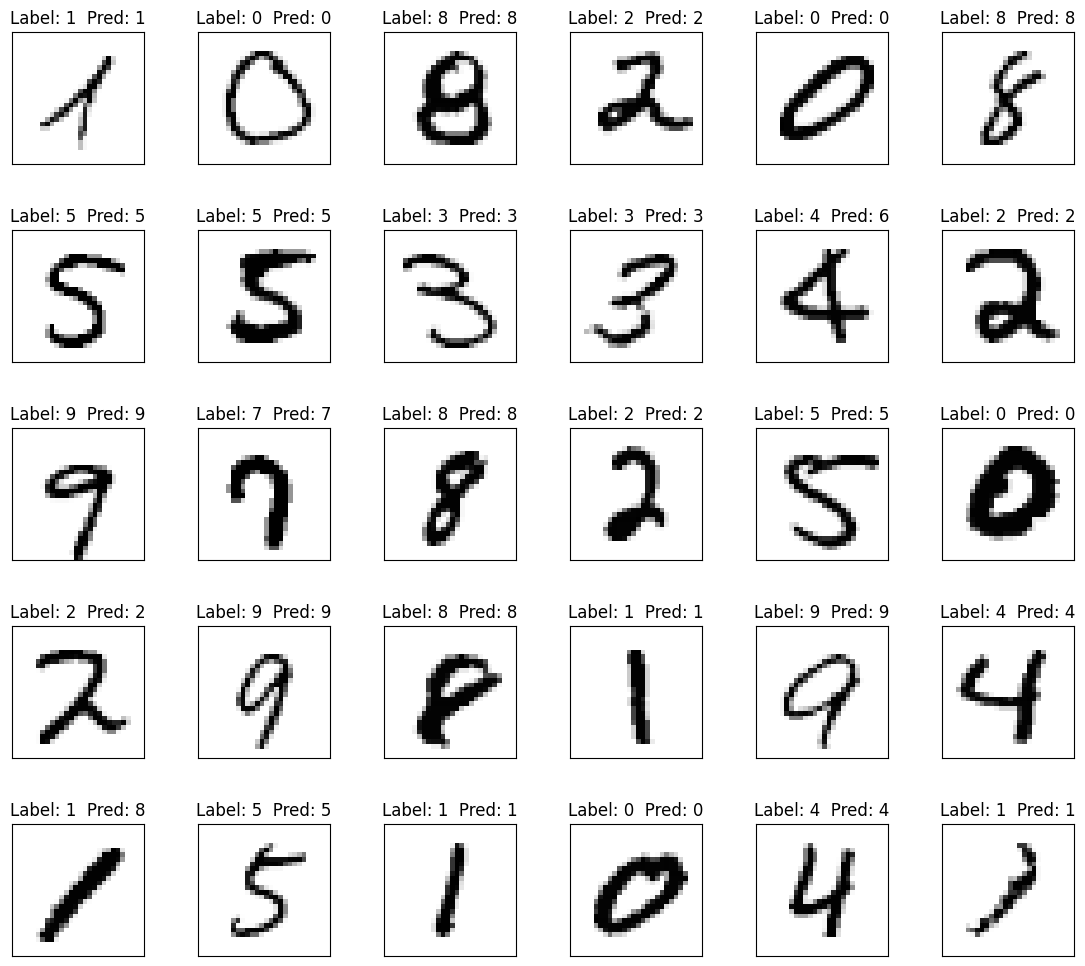

In [12]:
import matplotlib.pyplot as plt

def plotDigitGrid(X,y,idxs,y_hat=None):
    plt.rcdefaults()
    plt.figure(figsize=(14,12))

    for i in range(len(idxs)):
        plt.subplot(5,6,i+1)

        if y_hat is None:
            plt.title('Label: {label}'.format(label=y[idxs[i]]))
        else:
            plt.title("Label: {label}  Pred: {pred}".format(label=y[idxs[i]], pred=y_hat[idxs[i]]))

        plt.imshow(X[idxs[i]], cmap='Greys')
        plt.tick_params(
            axis='both',          # changes apply to the x-axis and y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # tick marks on bottom side are off
            left=False,        # tick marks on left side are off
            labelleft=False,   # label on left side are off
            labelbottom=False) # labels along the bottom edge are off
        plt.subplots_adjust(hspace=0.5)

    plt.show()


sample_test_df = predictions.sample(n=30)

# add image array to dataframe
sample_test_df['image'] = sample_test_df['image_path'].apply(plt.imread)

# plot test sample
plotDigitGrid(sample_test_df['image'], sample_test_df['label'], sample_test_df.index, y_hat=sample_test_df['label_predictions'])